In [1]:
import numpy as np

In [2]:
x = [3, 7, 9, 11, 14, 15, 19]
y = [0.1, 2.6, 7, 5.5, 8, 4, 11]

x = np.array(x).reshape((-1, 1))
Y = np.array(y)

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)
model.score(x, Y)

0.6978067537448582

In [4]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.8178512396694213
slope: [0.5631405]


In [5]:
Y_pred = model.coef_ * x + model.intercept_
Y_pred

array([[0.87157025],
       [3.12413223],
       [4.25041322],
       [5.37669421],
       [7.0661157 ],
       [7.6292562 ],
       [9.88181818]])

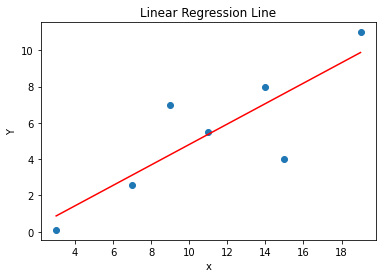

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,Y)
plt.plot(x, Y_pred, color='red')
plt.title('Linear Regression Line')
plt.ylabel("Y")
plt.xlabel("x")
plt.show()

In [7]:
mse = []
mae = []
for y, y_pred in zip(Y,Y_pred):
    mse.append(round( 1/len(Y) * (float(y_pred) - y)**2, 5))
    mae.append(round( abs(1/len(Y) * (float(y_pred) - y)), 5))
    # mae = mean_absolute_error(Y,Y_pred)
    
print('MSE=', mse)
print('MAE=', mae)

MSE= [0.08505, 0.03924, 1.08003, 0.00217, 0.12459, 1.88164, 0.17862]
MAE= [0.11022, 0.07488, 0.3928, 0.01762, 0.13341, 0.51847, 0.15974]


In [8]:
import pandas as pd

total_df = pd.DataFrame(zip(x.ravel(), Y, Y_pred.ravel(), mae, mse),
               columns =['X','Y', 'Y_hat', 'mAE', 'mSE'])

In [9]:
total_df

,X,Y,Y_hat,mAE,mSE
0,3,0.1,0.871570,0.11022,0.08505
1,7,2.6,3.124132,0.07488,0.03924
2,9,7.0,4.250413,0.39280,1.08003
3,11,5.5,5.376694,0.01762,0.00217
4,14,8.0,7.066116,0.13341,0.12459
5,15,4.0,7.629256,0.51847,1.88164
6,19,11.0,9.881818,0.15974,0.17862


In [10]:
total_df.to_csv('csv_data/task3_results.csv', 
                sep=';', decimal=',', index=False)